In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import csv
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from sklearn.preprocessing import LabelBinarizer
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
import matplotlib.pyplot as plt

def open_image(X_value):
    return 1. / 255 * img_to_array(load_img('dataset/'+ X_value))


In [2]:
x_set = []
y_set = []

with open('index.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if len(row) > 1:
            if row[0] and row[1] and row[2] and row[3]:
                    if os.path.isfile("dataset/" + row[0]):
                        x_set.append(row[0])
                        y_set.append(row[3])

lb = LabelBinarizer()
y_set_cat = lb.fit_transform(y_set)
X_train, X_test, y_train, y_test = train_test_split(x_set, y_set_cat, test_size=0.25, random_state=1)


In [3]:
input_size = open_image(X_train[0]).shape
output_size = len(y_set_cat[0])

def baseline_model():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_size))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model
ann_model = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=8)
fin_model = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=8)
X_train_adapt = np.array(list(map(open_image, X_train)))
baseline_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       7

In [4]:
kfold= RepeatedKFold(n_splits=5, n_repeats=1)
results= cross_val_score(ann_model, X_train_adapt, y_train, cv=kfold, n_jobs=2, verbose=1)  # 2 cpus
results.mean()  # Mean MSE

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Epoch 1/50Epoch 1/50

314/314 [==============================] - 177s 541ms/step - loss: 3.5209 - acc: 0.1289
Epoch 2/50
314/314 [==============================] - 178s 546ms/step - loss: 3.1816 - acc: 0.1420
Epoch 2/50
314/314 [==============================] - 170s 540ms/step - loss: 2.8480 - acc: 0.1726
Epoch 3/50
314/314 [==============================] - 171s 546ms/step - loss: 2.8721 - acc: 0.1318
Epoch 3/50
314/314 [==============================] - 171s 543ms/step - loss: 2.7066 - acc: 0.2144
Epoch 4/50
314/314 [==============================] - 170s 542ms/step - loss: 2.8747 - acc: 0.1376
Epoch 4/50
314/314 [==============================] - 170s 543ms/step - loss: 2.5852 - acc: 0.2326
Epoch 5/50
314/314 [==============================] - 170s 542ms/step - loss: 2.8610 - acc: 0.1524
Epoch 5/50
314/314 [==============================] - 169s 538ms/step - loss: 2.4654 - acc: 0.2603
Epoch 6/50
314/314 [==============================] - 170s 540ms/step - loss: 2.8655 - acc: 0.1483

[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 349.4min finished


0.24091443717479705

In [5]:

history = fin_model.fit(X_train_adapt, y_train)

Epoch 1/50
392/392 [==============================] - 121s 293ms/step - loss: 3.2141 - acc: 0.1177
Epoch 2/50
392/392 [==============================] - 114s 292ms/step - loss: 2.8388 - acc: 0.1586
Epoch 3/50
392/392 [==============================] - 116s 296ms/step - loss: 2.6889 - acc: 0.1992
Epoch 4/50
392/392 [==============================] - 122s 312ms/step - loss: 2.5721 - acc: 0.2230
Epoch 5/50
392/392 [==============================] - 122s 312ms/step - loss: 2.4662 - acc: 0.2558
Epoch 6/50
392/392 [==============================] - 123s 314ms/step - loss: 2.2819 - acc: 0.2898
Epoch 7/50
392/392 [==============================] - 122s 311ms/step - loss: 2.2134 - acc: 0.3090
Epoch 8/50
392/392 [==============================] - 123s 313ms/step - loss: 2.0337 - acc: 0.3759
Epoch 9/50
392/392 [==============================] - 122s 312ms/step - loss: 1.9373 - acc: 0.3909
Epoch 10/50
392/392 [==============================] - 122s 312ms/step - loss: 1.7325 - acc: 0.4568
Epoch 11/

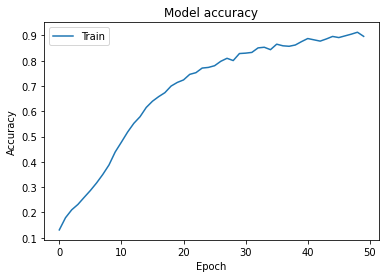

In [6]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()